# Analisis en Python 

A continuación se estudiarán y analizarán tres dataframes que contienen información sobre las compañias de taxis y su número de viajes, los lugares de finalización de viajes y los viajes promedios y un tercer archivo que contiene las fechas, las condiciones climaticas y los tiempos de viaje.

Con el tercer archivo se realizará una prueba de hipótesis.

**Contenido**

1. Carga de librerias


2. Exportar y explorar los dataframes

    2.1 Exploración del archivo 1
    
    2.2 Exploración del archivo 2
    
    2.3 Exploración del archivo 3


3. Comprobación de hipótesis


4. Conclusiones

### Carga de librerias


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
from scipy import stats as st

### Exportar y explorar los dataframe

#### Explorando el archivo 1

In [2]:
df_company_trips=pd.read_csv('/datasets/project_sql_result_01.csv')
df_company_trips.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [3]:
df_company_trips.head(10)

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953


In [4]:
df_company_trips.isna().sum()

company_name    0
trips_amount    0
dtype: int64

In [5]:
df_company_trips.duplicated().sum()

0

Después de realizar la exploración inicial del archivo se revisó si contenia valores null, duplicados y que la información que contiene corresponde al tipo de datos. Este archivo está completo y cumple con los tipos de datos.

#### Exploarando el archivo 2

In [6]:
dropoff_and_avgtrips=pd.read_csv('/datasets/project_sql_result_04.csv')
dropoff_and_avgtrips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [7]:
dropoff_and_avgtrips.head(10)

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


In [8]:
dropoff_and_avgtrips.isna().sum()

dropoff_location_name    0
average_trips            0
dtype: int64

In [9]:
dropoff_and_avgtrips.duplicated().sum()

0

El archivo 2 no tiene valores faltantes, ni duplicados y los tipos de datos están correctos.

#### Explorando el archivo 3

In [10]:
weather_records=pd.read_csv('/datasets/project_sql_result_07.csv')
weather_records.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


In [11]:
weather_records.head(10)

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0
5,2017-11-11 04:00:00,Good,1320.0
6,2017-11-04 16:00:00,Bad,2969.0
7,2017-11-18 11:00:00,Good,2280.0
8,2017-11-11 14:00:00,Good,2460.0
9,2017-11-11 12:00:00,Good,2040.0


In [12]:
weather_records.isna().sum()

start_ts              0
weather_conditions    0
duration_seconds      0
dtype: int64

In [13]:
weather_records.duplicated().sum()

197

Este tercer archivo no presenta valores ausentes, pero el tipo de dato asignado para la columna de fecha no corresponde, por lo cual, antes de proseguir habrá que corregirlo, también aparecen 197 filas duplicadas, estas se revisaran y posteriormente, si es necesario, se procederá a eliminarlas. 

In [14]:
weather_records['duplicated']=weather_records.duplicated()

In [15]:
weather_records.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
 3   duplicated          1068 non-null   bool   
dtypes: bool(1), float64(1), object(2)
memory usage: 26.2+ KB


In [16]:
weather_records[weather_records['duplicated']==True].value_counts()


start_ts             weather_conditions  duration_seconds  duplicated
2017-11-11 08:00:00  Good                1380.0            True          7
2017-11-11 06:00:00  Good                1260.0            True          7
                                         1380.0            True          6
2017-11-11 08:00:00  Good                1200.0            True          5
2017-11-11 16:00:00  Good                2400.0            True          5
                                                                        ..
2017-11-04 15:00:00  Good                3180.0            True          1
2017-11-04 14:00:00  Good                3840.0            True          1
                                         3480.0            True          1
                                         3360.0            True          1
2017-11-25 12:00:00  Good                1440.0            True          1
Length: 115, dtype: int64

In [17]:
weather_records[weather_records['start_ts']=='2017-11-11 08:00:00'].value_counts()

start_ts             weather_conditions  duration_seconds  duplicated
2017-11-11 08:00:00  Good                1380.0            True          7
                                         1200.0            True          5
                                         1320.0            True          4
                                         1440.0            True          2
                                         1063.0            False         1
                                         1560.0            False         1
                                         1519.0            False         1
                                         1500.0            True          1
                                                           False         1
                                         1470.0            False         1
                                         1440.0            False         1
                                         1417.0            False         1
                              

Después de revisar los datos duplicados, se decidirá, por el momento, no eliminar los valores duplicados ya que se desconoce como fueron recolectados y cargados los datos en la base datos,se eliminará la columna creada para estudiar las filas duplicadas

In [18]:
#Arreglando el tipo de dato en la columna start_ts
weather_records['start_ts']=pd.to_datetime(weather_records['start_ts'], format= '%Y-%m-%d %H:%M:%S')

In [19]:
weather_records.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1068 non-null   datetime64[ns]
 1   weather_conditions  1068 non-null   object        
 2   duration_seconds    1068 non-null   float64       
 3   duplicated          1068 non-null   bool          
dtypes: bool(1), datetime64[ns](1), float64(1), object(1)
memory usage: 26.2+ KB


In [20]:
weather_records.drop(columns='duplicated', axis=1, inplace=True)

In [21]:
weather_records.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1068 non-null   datetime64[ns]
 1   weather_conditions  1068 non-null   object        
 2   duration_seconds    1068 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 25.2+ KB


Buscando los barrios con mayor flujo de viajes

In [22]:
#Se hará un slice con los 10 primeros barrios pada realizar su analisis
drop_trips_slice=dropoff_and_avgtrips.loc[0:9]
drop_trips_slice

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


Text(0.5, 1.0, 'Top 10 avg. Trips Dropoff')

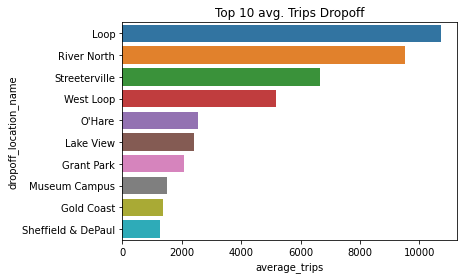

In [23]:
sns.barplot(y='dropoff_location_name', x='average_trips', data=drop_trips_slice)
plt.title('Top 10 avg. Trips Dropoff')


Se puede observar en el gráfico que Loop es el principal barrio donde terminan los viajes con un promedio de 10727,46 viajes, seguido de River North con 9523,66.

In [24]:
#Filtrando las 10 principales compañias por numero de viajes
df_company_trips_slice=df_company_trips.loc[0:9]
df_company_trips_slice

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953


Text(0.5, 1.0, 'Top 10 Companies for number of trips')

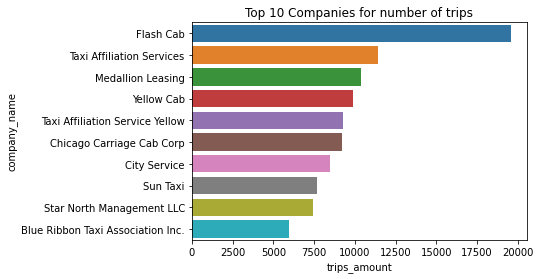

In [25]:
sns.barplot(y='company_name', x='trips_amount', data=df_company_trips_slice)
plt.title('Top 10 Companies for number of trips')


Se puede obeservar que Flash Cab tiene el mayor numero de viajes de entre todas las compañias con 19558 viajes realizados, le sigue en segundo lugar Taxi Affiliation Services 11422 viajes, una diferencia entre ambas de 8136 viajes más para Flash Cab (41% más).

### Comprobación de hipótesis

Se tratará de comprobar o rechazar la siguiente hipótesis nula:

**"La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare es igual los sábados lluviosos"**

La hipótesis alternativa será la siguiente: **"La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos"**

Los pasos a seguir para hacer la prueba de la hipótesis son los siguientes:

Se establecerá el nivel de significación en 0.05

Se deberá separar los datos por el parametro weather_condition good o bad para obtener las dos poblaciones.

Se deberá determinar el tamaño de ambas poblaciones para determinar cual test aplicar.

In [26]:
weather_records["duration_seconds"]=weather_records["duration_seconds"].astype('int')
weather_records.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1068 non-null   datetime64[ns]
 1   weather_conditions  1068 non-null   object        
 2   duration_seconds    1068 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 25.2+ KB


In [27]:
#separacion de las muestras entre buen clima (good) y mal clima (bad) tomando la columna weather_conditions

group_good_weather=weather_records[weather_records["weather_conditions"]=="Good"]
group_bad_weather=weather_records[weather_records["weather_conditions"]=="Bad"]
print(group_good_weather.shape)
print(group_bad_weather.shape)

(888, 3)
(180, 3)


Se puede observar que los tamaños son diferentes para cada una de las condiciones, por ello se realizará un ttest_ind para comprobar las hipótesis

A continuación se comprobaran las varianzas para cada grupo para confirmar si son iguales o diferentes

In [28]:
np.var(group_bad_weather['duration_seconds'])

517403.56330246915

In [29]:
np.var(group_good_weather['duration_seconds'])

575732.9308497686

In [30]:
#Prueba de hipótesis

alpha=0.05
results =st.ttest_ind(group_good_weather['duration_seconds'],group_bad_weather['duration_seconds'], equal_var=False)
print('p-value:',results.pvalue)

if results.pvalue < alpha:
    print("Rechazamos la hipótesis nula")
else:
    print("No rechazamos la hipótesis nula")

p-value: 6.738994326108734e-12
Rechazamos la hipótesis nula


En el test se rechazó la hipótesis nula, es decir, que los sabados lluviosos cambia tiempo promedio de los viajes desde el Loop hasta el Aeropuerto O'Hare.

### Conclusiones

1. Se encontraron los 10 primeros lugares de finalización de viajes, se pudo observar que Loop y O'Hare se encuentran entre los cinco primeros lugares de destino de finalización de viajes con 10727 y 2546 respectivamente.

2. En la gráfica referente a las compañias Flash Cab es la número uno con 19558 viajes realizados, tiene 41% más de viajes que la segunda compañia que es Taxi Affiliation Services con 11422 viajes.

3. En le test de hipótesis la hipótesis nula fue rechazada, aceptandose la hipótesis alternativa que indica que los sabados lluviosos cambia el tiempo promedio de los viajes desde Loop hasta el Aeropuerto de O'Hare.
    